In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

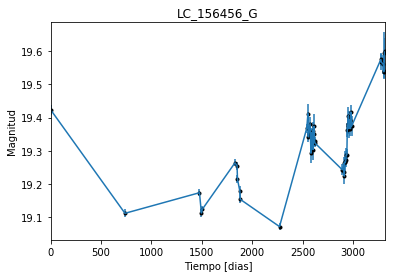

In [2]:
data = np.genfromtxt('LC_156456_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_156456_G')
plt.savefig("LC_156456_G.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

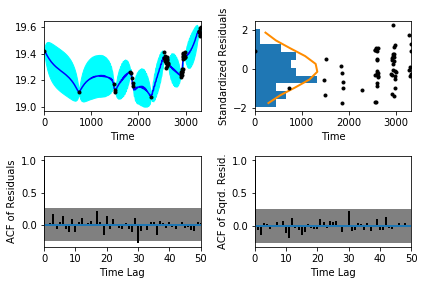

In [5]:
sample.assess_fit()

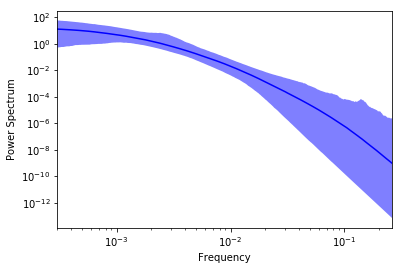

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

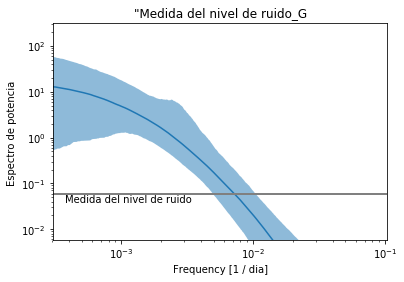

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_156456_G')
plt.title('"Medida del nivel de ruido_G')
plt.savefig("Medida del nivel de ruido_G.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_156456_G')

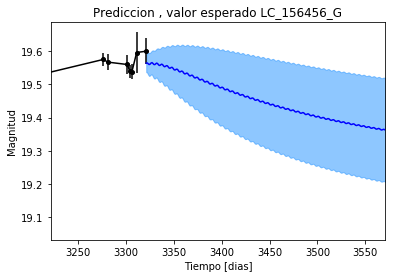

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_156456_G')

Text(0.5,1,'Prediccion, Caminos simulados  LC_156456_G')

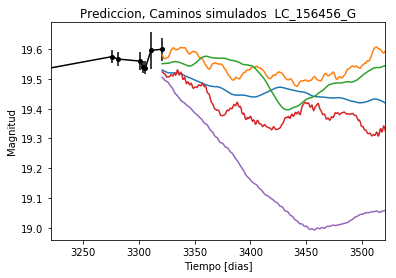

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_156456_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


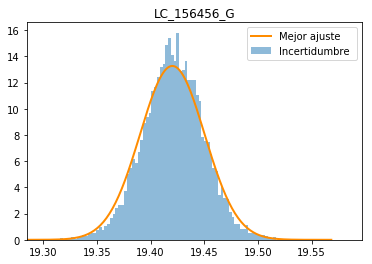

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_156456_G')
plt.savefig("Mejor_ajuste_LC_156456_G.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_156456_G')

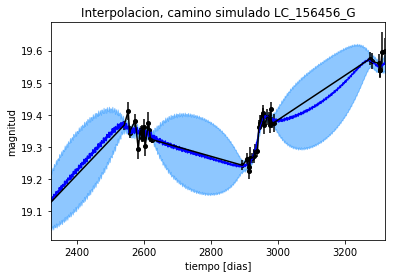

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_156456_G')

Text(0.5,1,'Interpolacion, camino simulado LC_156456_G')

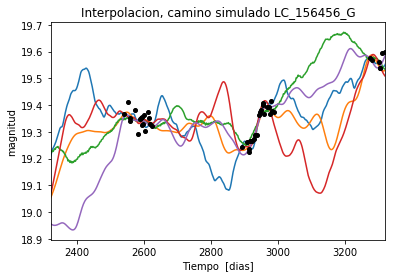

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_156456_G')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 345.828981461
Median: 0.0134685000827
Standard deviation: 0.107528452472
68% credibility interval: [ 0.00133201  0.12413619]
95% credibility interval: [  3.75310696e-04   4.13911384e-01]
99% credibility interval: [  3.14037229e-04   5.05720927e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 934.933599039
Median: 0.00350664460413
Standard deviation: 0.046980602265
68% credibility interval: [ 0.00057058  0.01997497]
95% credibility interval: [ 0.00032684  0.13876027]
99% credibility interval: [  3.08040250e-04   3.32400897e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 676.739868676
Median: 0.0126149178637
Standard d

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1074.00734405
Median: 127.47236906
Standard deviation: 1.73291800458
68% credibility interval: [ 125.57621912  128.74981597]
95% credibility interval: [ 122.86694191  129.43273898]
99% credibility interval: [ 120.80073783  129.96006308]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 413.388629235
Median: 0.4931368634
Standard deviation: 1.17366346144
68% credibility interval: [ 0.07630121  2.26117177]
95% credibility interval: [ 0.02160511  3.96997506]
99% credibility interval: [ 0.0126046  5.2757359]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 583.26516794
Median: 0.246670043675
Standard deviation: 2.37954664489
68% credibility interval: [ 0.01872957  2.38307057]
95% credibility interval: [  3.81531579e-03   9

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 10044.7864689
Median: 2.75091557514e-20
Standard deviation: 4.62458346793e+84
68% credibility interval: [  1.39148135e-70   2.34644971e+00]
95% credibility interval: [  6.21179212e-131   4.39856107e+060]
99% credibility interval: [  1.86747811e-137   5.22024510e+079]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2444.04901202
Median: 19.28519762
Standard deviation: 0.0825778307325
68% credibility interval: [ 19.21824152  19.35869069]
95% credibility interval: [ 19.12697819  19.45692713]
99% credibility interval: [ 19.04233453  19.56474956]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 905.952318013
Median: 0.00651735995594
Standard deviation: 0.126809352912
68% credibility interval: [ 0.          0.17521247]
95% credibility interval: [ 0.          0.45729987]
99% credibility interval: [ 0.          0.51205345]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 905.952318013
Median: 0.00651735995594
Standard deviation: 0.126809352912
68% credibility interval: [ 0.          0.17521247]
95% credibility interval: [ 0.          0.45729987]
99% credibility interval: [ 0.          0.51205345]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 495.766551612
Median: 0.0
Standard deviation: 0.000635838517393
68% 

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1074.00734405
Median: 127.47236906
Standard deviation: 1.73291800458
68% credibility interval: [ 125.57621912  128.74981597]
95% credibility interval: [ 122.86694191  129.43273898]
99% credibility interval: [ 120.80073783  129.96006308]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1441.3745318
Median: 0.0326035829961
Standard deviation: 0.0326392813922
68% credibility interval: [ 0.02025234  0.05661921]
95% credibility interval: [ 0.01354254  0.11218735]
99% credibility interval: [ 0.01080573  0.20115205]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1469.08044202
Median: 1.05821778132
Standard deviation: 0.174786526307
68% credibility interval: [ 0.90501569  1.24050536]
95% credibility interval: [ 0.7863183   1.46619339]
99% credibility interval: [ 0.72583652  1.64273468]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 670.341426381
Median: 0.00013332512667
Standard deviation: 0.00519442464067
68% credibility interval: [  1.73409996e-06   1.68139683e-03]
95% credibility interval: [  9.00508983e-65   9.63822917e-03]
99% credibility interval: [  1.42103830e-83   3.19274633e-02]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 345.828981461
Median: (-0.0846250818294-3.16819369996j)
Standard deviation: 1.04465358436
68% credibility interval: [-0.77997071-0.24737967j -0.00836926-0.06120957j]
95% credibility interval: [ -2.60068193e+00+0.j          -2.35814665e-03-0.04940221j]
99% credibility interval: [ -3.17753830e+00+0.j          -1.97315410e-03-0.00310136j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 934.933599039
Median: (-0.0220328978542+0.0596570691149j)
Standard deviation: 0.849689925926
68% credibility interval: [-0.12550646+0.32724184j -0.00358509+0.25749192j]
95% credibility interval: [-0.87185651+1.58956783j -0.00205358+1.03573905j]
99% credibility interval: [ -2.08853643e+00+2.73483072j  -1.93547397e-03+0.j        ]
Posterior s